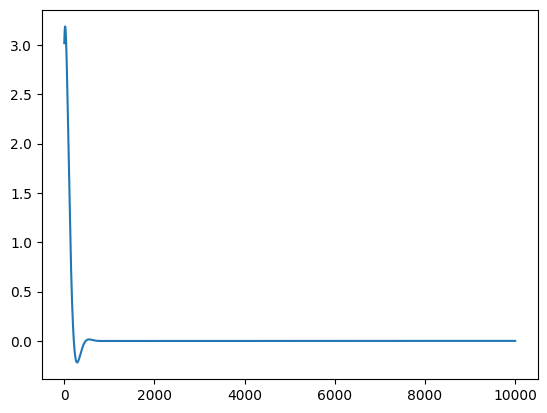

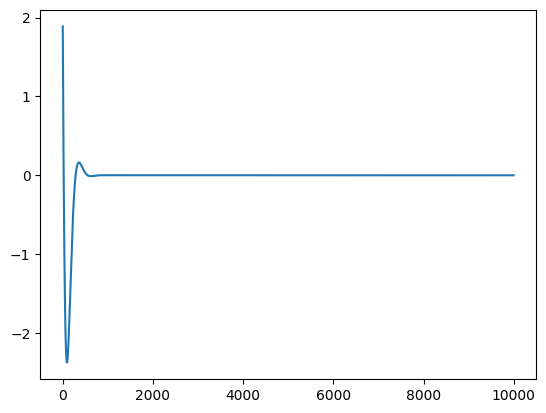

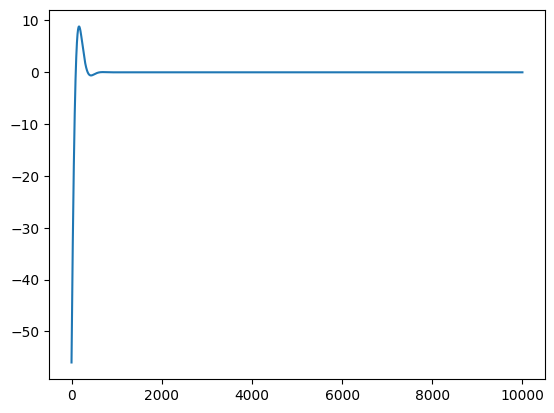

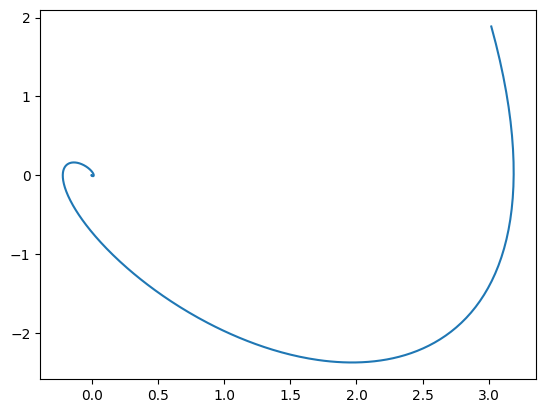

In [23]:
import matplotlib.pyplot as plt

p = 3
p_dot = 2
m = 5
dt = 0.01

num_iter = 10000

ps, pds, Fs = [], [], []

Kp = 12
Kd = 10

for i in range(num_iter):
    #calculate control
    #F = -3
    F = - Kp * p - Kd * p_dot
    
    p_ddot = F / m
    
    p_dot += p_ddot * dt
    p     += p_dot * dt
    
    ps.append(p)
    pds.append(p_dot)
    Fs.append(F)

plt.plot(ps)
plt.show()
plt.plot(pds)
plt.show()
plt.plot(Fs)
plt.show()
plt.plot(ps, pds)
plt.show()


In [6]:
import numpy as np
import cv2

class Pendulum:
    def __init__(self, m, l, g, dt, alpha, omega, inverted = False, linearized = True):
        self.m = m
        self.l = l
        self.g = g
        self.dt = dt
        self.alpha = alpha
        self.omega = omega
        self.inverted = 1 if inverted is True else -1
        self.linearized = linearized
    
    def x_dot(self):
        if (not self.linearized):
            alpha_ddot = self.l / self.g * np.sin(self.alpha)
        
        else:
            alpha_ddot = self.l / self.g * self.alpha
        
        alpha_ddot *= self.inverted
        
        return (self.omega, alpha_ddot)
    
    def integrate(self, xdot):
        self.omega += xdot[1] * self.dt
        
        # self.alpha += xdot[0] * self.dt
        self.alpha += self.omega * self.dt
    
    def draw(self, canvas, cx, cy, L):
        cv2.line(canvas, (cx, cy), (int(cx - self.inverted * L * np.sin(self.alpha)),
                                    int(cy - self.inverted * L * np.cos(self.alpha))), (123, 234, 234), 5)

pendulum = Pendulum(1, 1, np.pi**2, 0.1, 0.05, 0.01, inverted = True, linearized = False)

num_iter = 10000

WINDX, WINDY = 1000, 1000
canvas = np.ones((WINDY, WINDX, 3), np.uint8) * 50

for i in range(num_iter):
    xdot = pendulum.x_dot()
    pendulum.integrate(xdot)
    
    canvas = cv2.addWeighted(canvas, 0.9, canvas, 0.0, 0)
    
    pendulum.draw(canvas, WINDX // 2, WINDY // 2, 450)
    
    cv2.imshow("pendulum", canvas)
    
    key = cv2.waitKey(10)
    
    if (key == ord('q')):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(100)

-1

In [ ]:
!pip install opencv-python